In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from tqdm import tqdm


In [2]:
df1 =  pd.read_csv("../results/dk_news_2016_2024_ai_shard_1_v2.csv.tmp")
df2 =  pd.read_csv("../results/dk_news_2016_2024_ai_shard_2_v2.csv.tmp")
df3 =  pd.read_csv("../results/dk_news_2016_2024_ai_shard_3_v2.csv.tmp")
df4 =  pd.read_csv("../results/dk_news_2016_2024_ai_shard_0_v2.csv.tmp")
m_df1 = pd.read_csv("../results/missing_shard_0.csv")
m_df2 = pd.read_csv("../results/missing_shard_1.csv")
m_df3 = pd.read_csv("../results/missing_shard_2.csv")
m_df4 = pd.read_csv("../results/missing_shard_3.csv")
df = pd.concat([df1, df2, df3,df4,m_df1,m_df2,m_df3,m_df4], axis=0)
# drop duplicate orig_index row in df
df.drop_duplicates(subset='orig_index',inplace=True)
previous_df = pd.read_csv("../results/02_ai_scores_v2.csv")
# concat previous_df ['ai_score', 'keyword_score'] to df based on orig_index to previous_df index
df = df.merge(previous_df[['ai_score', 'keyword_score']], left_on='orig_index', right_index=True, how='left')
df.dropna(inplace=True,subset=["is_ai_llm"])
print(df.shape)
print(df.columns)
df.describe()
# only keep year larger than 2015
df = df[pd.to_datetime(df["published_date"], errors='coerce').dt.year >= 2016]




C:\Users\qswwq\AppData\Local\Temp\ipykernel_28700\2405640808.py:1: DtypeWarning: Columns (9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 =  pd.read_csv("results/dk_news_2016_2024_ai_shard_1_v2.csv.tmp")
C:\Users\qswwq\AppData\Local\Temp\ipykernel_28700\2405640808.py:2: DtypeWarning: Columns (9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 =  pd.read_csv("results/dk_news_2016_2024_ai_shard_2_v2.csv.tmp")
C:\Users\qswwq\AppData\Local\Temp\ipykernel_28700\2405640808.py:3: DtypeWarning: Columns (9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 =  pd.read_csv("results/dk_news_2016_2024_ai_shard_3_v2.csv.tmp")
C:\Users\qswwq\AppData\Local\Temp\ipykernel_28700\2405640808.py:4: DtypeWarning: Columns (9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 =  pd.read_csv("results/dk_news_2016_2024_ai_shard_0_v2.csv.tm

(810880, 17)
Index(['plain_text', 'published_date', 'title', 'tags', 'categories', 'author',
       'sitename', 'publisher', 'orig_index', 'is_ai_llm', 'ai_relevance_llm',
       'ai_topic_llm', 'ai_barrier_llm', 'ai_barrier_type_llm',
       'ai_barrier_summary_llm', 'ai_score', 'keyword_score'],
      dtype='object')


Shape: (808890, 17)
Columns: ['plain_text', 'published_date', 'title', 'tags', 'categories', 'author', 'sitename', 'publisher', 'orig_index', 'is_ai_llm', 'ai_relevance_llm', 'ai_topic_llm', 'ai_barrier_llm', 'ai_barrier_type_llm', 'ai_barrier_summary_llm', 'ai_score', 'keyword_score']

=== Basic info ===
<class 'pandas.core.frame.DataFrame'>
Index: 808890 entries, 0 to 188479
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   plain_text              808890 non-null  object        
 1   published_date          808890 non-null  datetime64[ns]
 2   title                   808890 non-null  object        
 3   tags                    190430 non-null  object        
 4   categories              318967 non-null  object        
 5   author                  719691 non-null  object        
 6   sitename                808890 non-null  object        
 7   publisher               808890 no

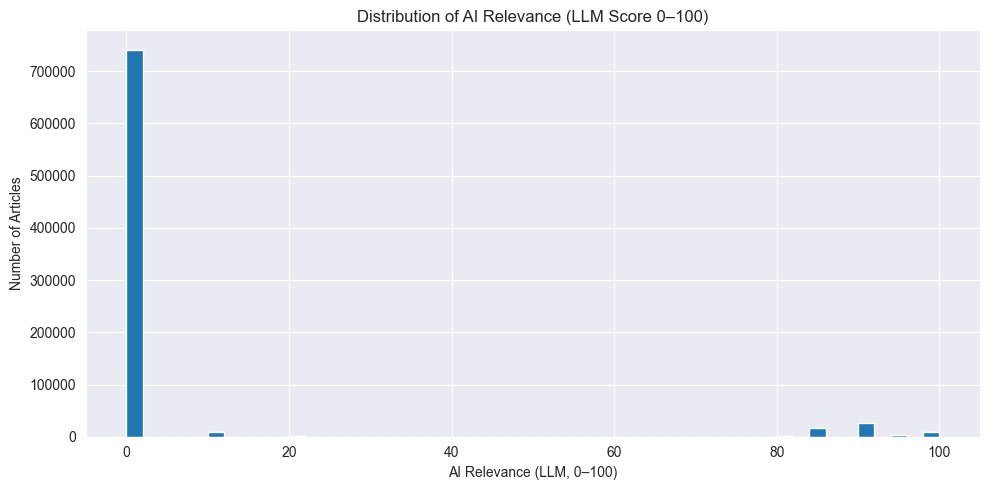

Saved: figures_ai_llm_overview\01_ai_relevance_distribution.png


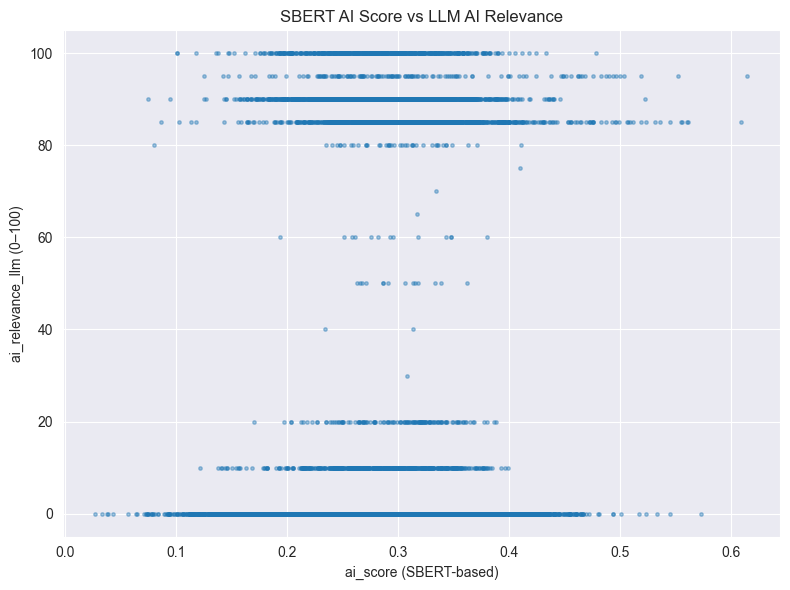

Saved: figures_ai_llm_overview\02_sbert_vs_llm_relevance.png


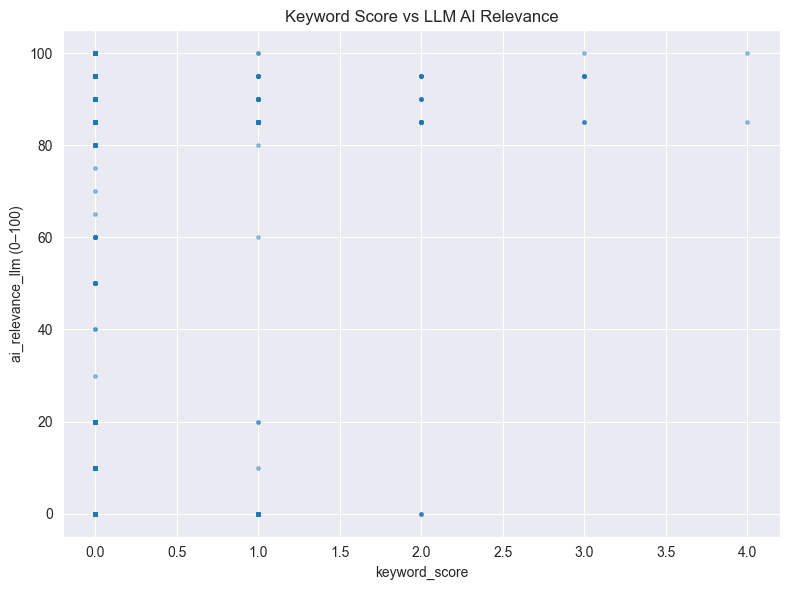

Saved: figures_ai_llm_overview\03_keyword_vs_llm_relevance.png


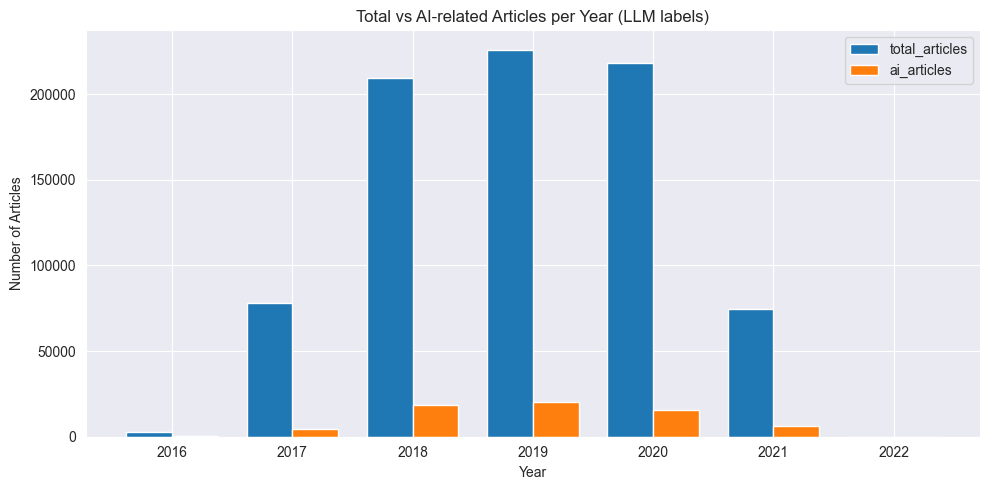

Saved: figures_ai_llm_overview\04_yearly_total_vs_ai.png


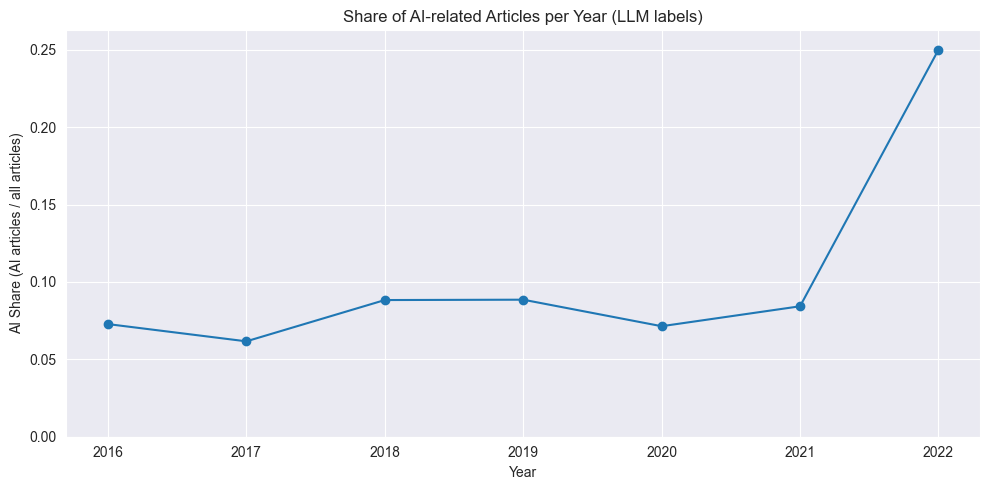

Saved: figures_ai_llm_overview\05_yearly_ai_share.png


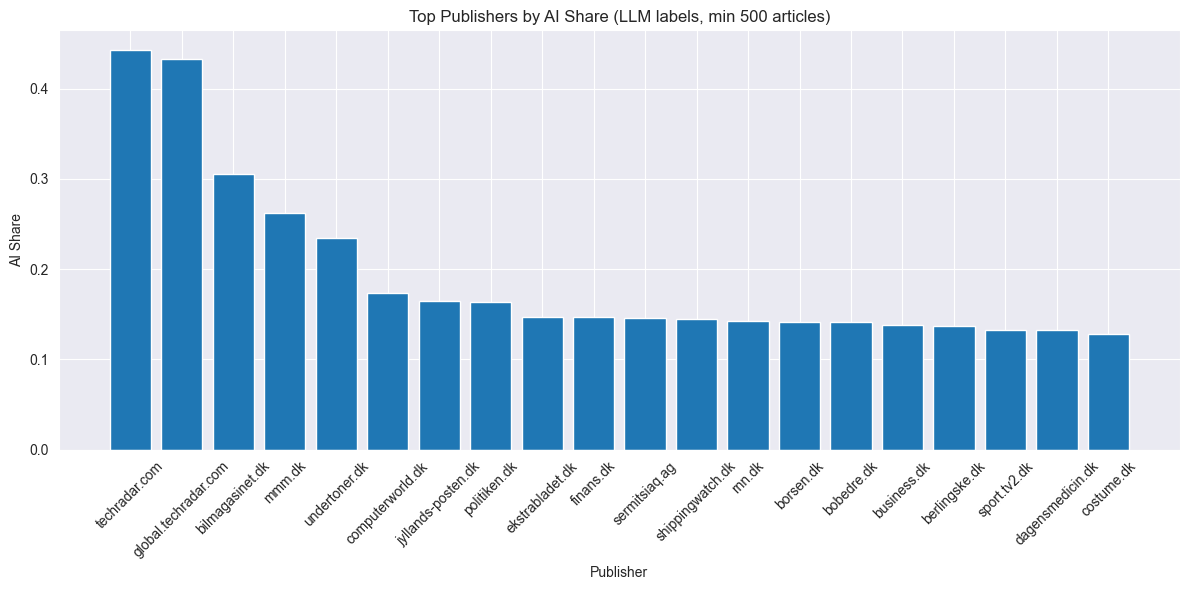

Saved: figures_ai_llm_overview\06_publisher_ai_share.png


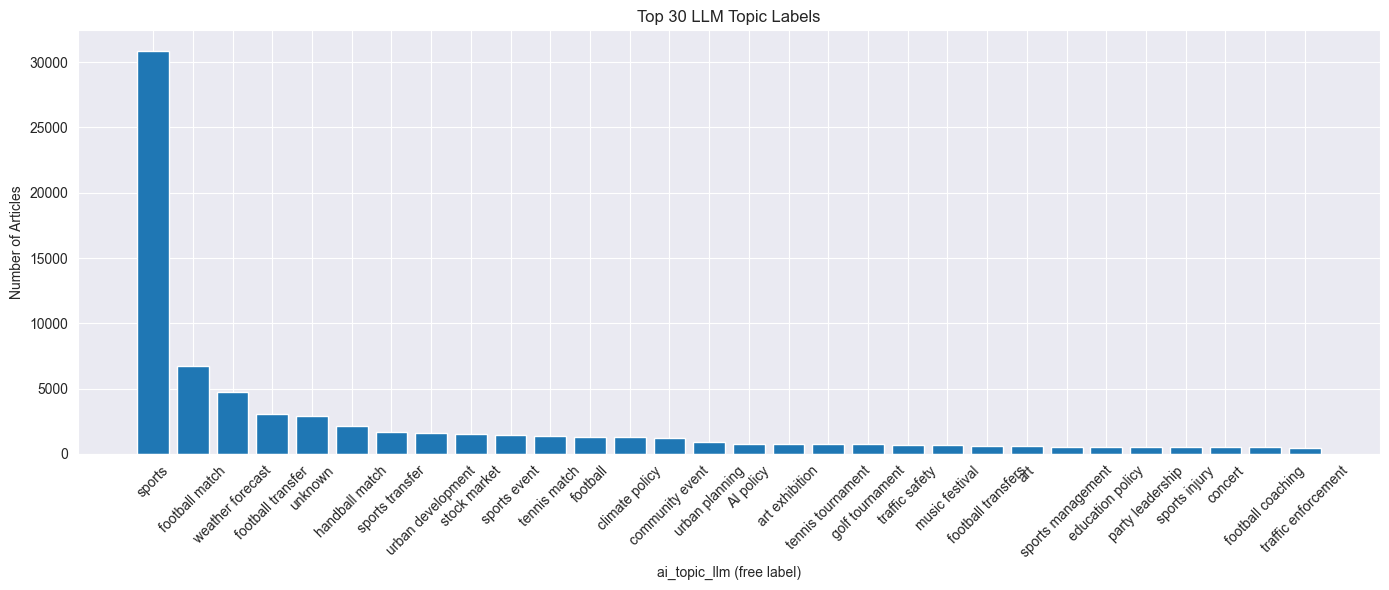

Saved: figures_ai_llm_overview\07_topic_distribution.png


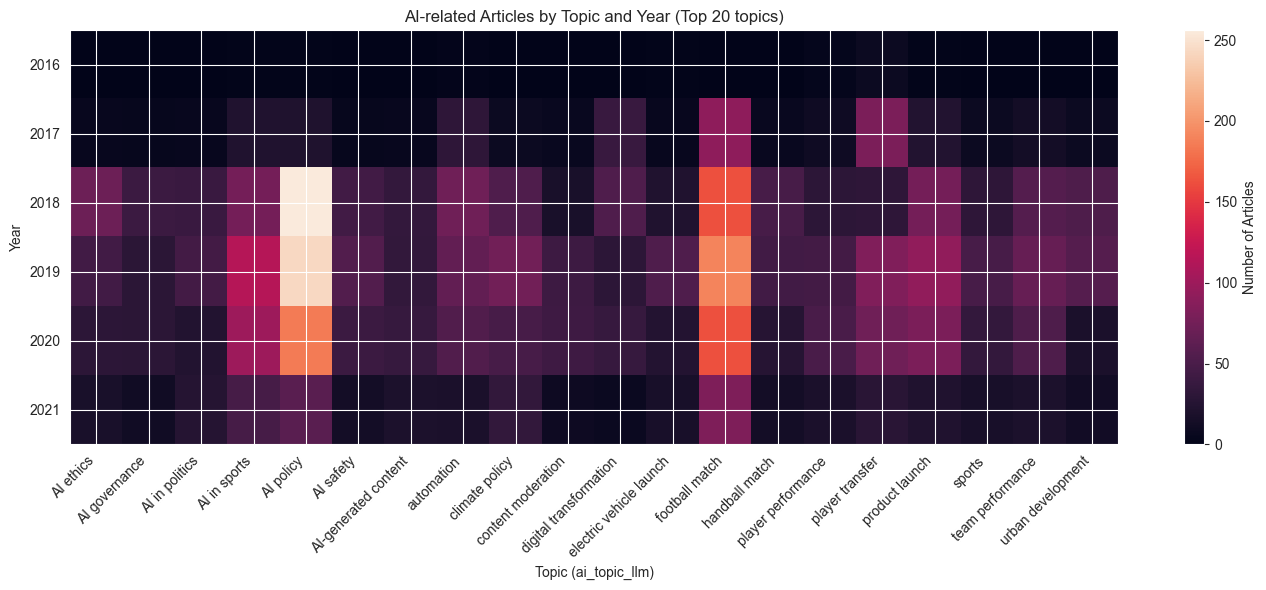

Saved: figures_ai_llm_overview\08_topic_year_heatmap.png


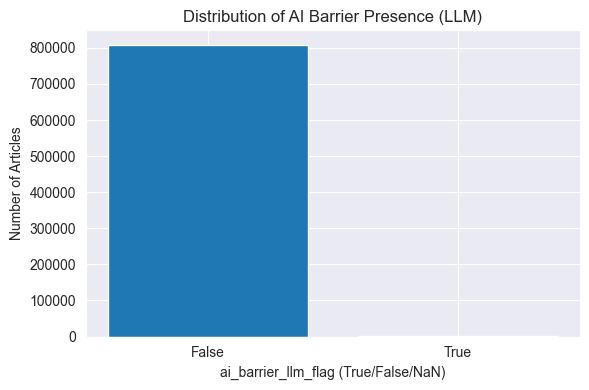

Saved: figures_ai_llm_overview\09_barrier_presence_distribution.png


C:\Users\qswwq\AppData\Local\Temp\ipykernel_28700\1487472461.py:122: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


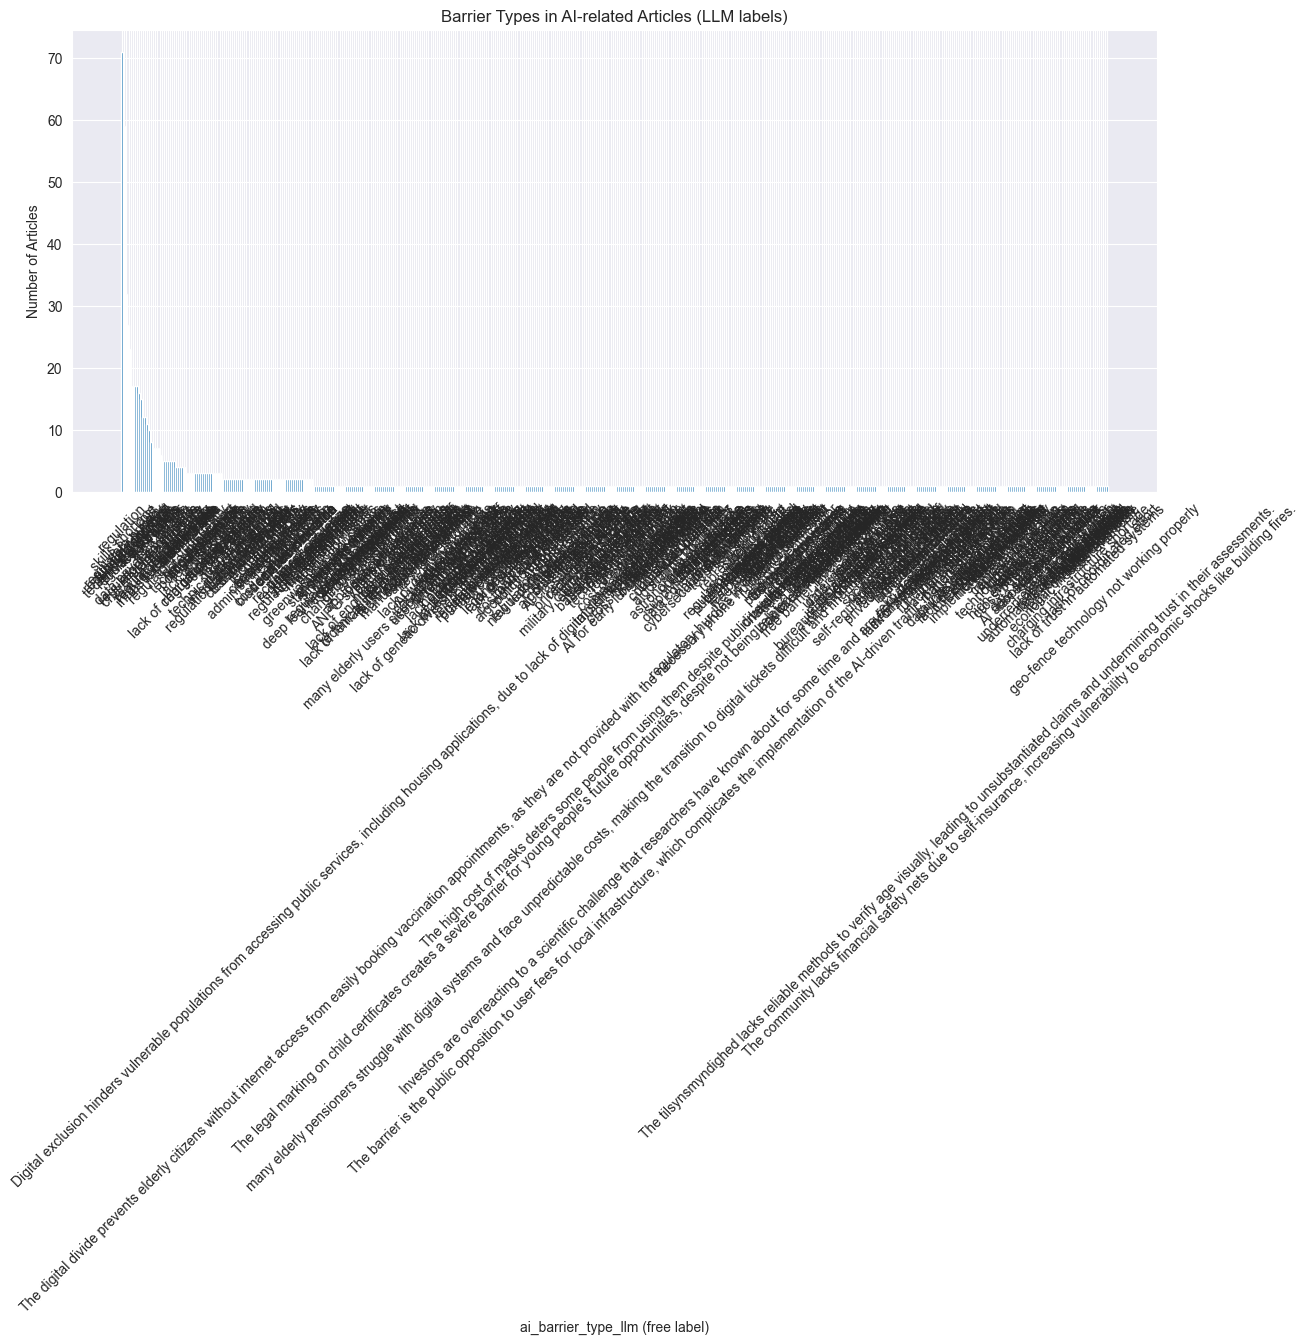

Saved: figures_ai_llm_overview\10_barrier_type_distribution.png


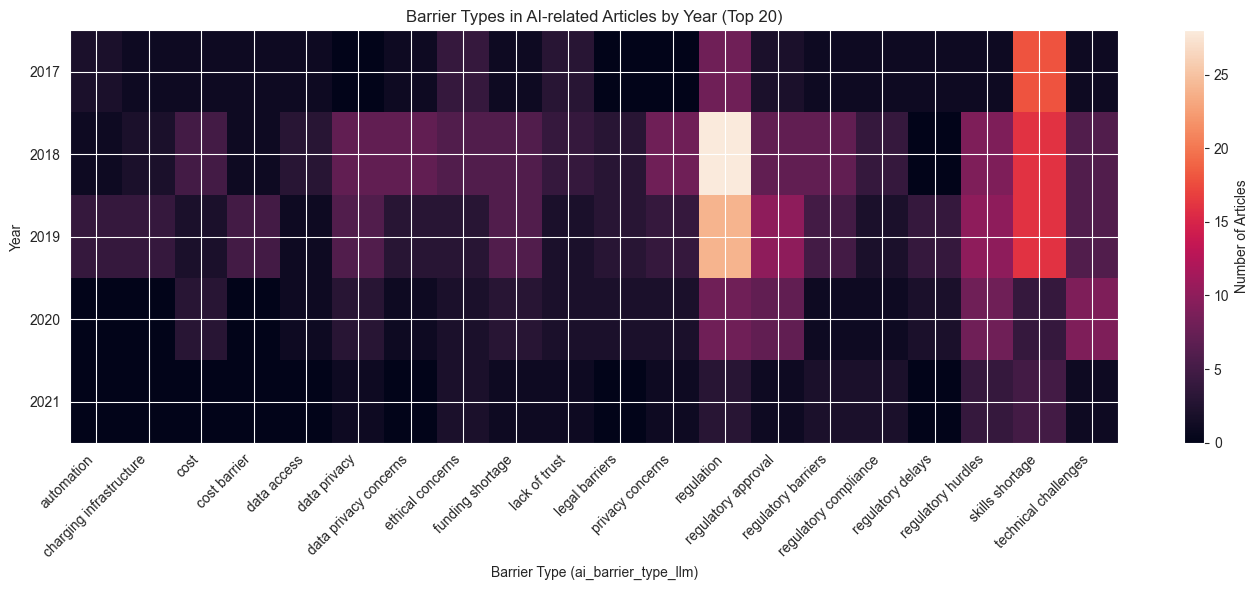

Saved: figures_ai_llm_overview\11_barrier_type_year_heatmap.png

All figures saved under: figures_ai_llm_overview


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =====================================================
# 0. Assume df is already loaded & concatenated
# =====================================================
# You said you already did:
# df1 =  pd.read_csv("results/dk_news_2016_2024_ai_shard_1_v2.csv")
# df2 =  pd.read_csv("results/dk_news_2016_2024_ai_shard_2_v2.csv")
# df3 =  pd.read_csv("results/dk_news_2016_2024_ai_shard_3_v2.csv")
# df4 =  pd.read_csv("results/dk_news_2016_2024_ai_shard_4_v2.csv")  # <- small fix: shard_4, not 3
# df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)

# If not, uncomment and fix paths:
# df1 =  pd.read_csv("results/dk_news_2016_2024_ai_shard_1_v2.csv")
# df2 =  pd.read_csv("results/dk_news_2016_2024_ai_shard_2_v2.csv")
# df3 =  pd.read_csv("results/dk_news_2016_2024_ai_shard_3_v2.csv")
# df4 =  pd.read_csv("results/dk_news_2016_2024_ai_shard_4_v2.csv")
# df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Directory for figures (PNG)
FIG_DIR = "../figures_ai_llm_overview"
os.makedirs(FIG_DIR, exist_ok=True)

# =====================================================
# 1. Basic cleaning & helpers
# =====================================================

# 1.1 Parse dates and extract year
if "published_date" in df.columns:
    df["published_date"] = pd.to_datetime(df["published_date"], errors="coerce")
    df["year"] = df["published_date"].dt.year
else:
    df["year"] = np.nan


def to_bool_series(series: pd.Series) -> pd.Series:
    """
    Robust boolean conversion:
    - true:  True, 1, "1", "true", "True", "ja", "yes"
    - false: False, 0, "0", "false", "False", "nej", "no"
    - others: NaN
    """
    s = series.astype(str).str.strip().str.lower()
    true_vals = {"1", "true", "ja", "yes"}
    false_vals = {"0", "false", "nej", "no"}

    def _map_val(v: str):
        if v in true_vals:
            return True
        if v in false_vals:
            return False
        return np.nan

    return s.map(_map_val)


# 1.2 Convert LLM AI flag to boolean
if "is_ai_llm" in df.columns:
    df["is_ai_llm_flag"] = to_bool_series(df["is_ai_llm"])
else:
    df["is_ai_llm_flag"] = np.nan

if "is_ai" in df.columns:
    df["is_ai_flag"] = to_bool_series(df["is_ai"])
else:
    df["is_ai_flag"] = np.nan

# 1.3 Ensure relevance score is numeric
if "ai_relevance_llm" in df.columns:
    df["ai_relevance_llm"] = pd.to_numeric(df["ai_relevance_llm"], errors="coerce")

# 1.4 Ensure barrier flag is boolean
if "ai_barrier_llm" in df.columns:
    df["ai_barrier_llm_flag"] = to_bool_series(df["ai_barrier_llm"])
else:
    df["ai_barrier_llm_flag"] = np.nan

# =====================================================
# 2. Basic descriptive statistics (printed)
# =====================================================

print("\n=== Basic info ===")
print(df.info())

print("\n=== Missing value ratio per column ===")
missing_ratio = df.isna().mean().sort_values(ascending=False)
print(missing_ratio)

print("\n=== Numeric describe ===")
print(df.describe())

print("\n=== Example topic / barrier columns head ===")
cols_preview = [
    "orig_index",
    "published_date",
    "sitename",
    "publisher",
    "is_ai_llm_flag",
    "ai_relevance_llm",
    "ai_topic_llm",
    "ai_barrier_llm_flag",
    "ai_barrier_type_llm",
]
cols_preview = [c for c in cols_preview if c in df.columns]
print(df[cols_preview].head(10))


# =====================================================
# Plot helpers
# =====================================================


def _save_show_close(fig: plt.Figure, filename: str, dpi: int = 200):
    """Save to FIG_DIR as PNG, show in notebook, then close to free memory."""
    out_path = os.path.join(FIG_DIR, filename)
    fig.tight_layout()
    fig.savefig(out_path, dpi=dpi, bbox_inches="tight")
    plt.show()
    plt.close(fig)
    print("Saved:", out_path)


# =====================================================
# 3. Distribution of AI relevance scores (hist)
# =====================================================

if "ai_relevance_llm" in df.columns:
    x = df["ai_relevance_llm"].dropna()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(x, bins=50)
    ax.set_title("Distribution of AI Relevance (LLM Score 0–100)")
    ax.set_xlabel("AI Relevance (LLM, 0–100)")
    ax.set_ylabel("Number of Articles")
    _save_show_close(fig, "01_ai_relevance_distribution.png")

# =====================================================
# 4. Relationship: ai_score / keyword_score vs LLM relevance (scatter)
# =====================================================

MAX_POINTS_SCATTER = 50_000
need_cols = [c for c in ["ai_relevance_llm", "ai_score", "keyword_score"] if c in df.columns]
if "ai_relevance_llm" in need_cols:
    scatter_df = df[need_cols].copy().dropna()
    if len(scatter_df) > MAX_POINTS_SCATTER:
        scatter_df = scatter_df.sample(MAX_POINTS_SCATTER, random_state=42)

    if "ai_score" in scatter_df.columns:
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(scatter_df["ai_score"], scatter_df["ai_relevance_llm"], s=6, alpha=0.4)
        ax.set_title("SBERT AI Score vs LLM AI Relevance")
        ax.set_xlabel("ai_score (SBERT-based)")
        ax.set_ylabel("ai_relevance_llm (0–100)")
        _save_show_close(fig, "02_sbert_vs_llm_relevance.png")

    if "keyword_score" in scatter_df.columns:
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(scatter_df["keyword_score"], scatter_df["ai_relevance_llm"], s=6, alpha=0.4)
        ax.set_title("Keyword Score vs LLM AI Relevance")
        ax.set_xlabel("keyword_score")
        ax.set_ylabel("ai_relevance_llm (0–100)")
        _save_show_close(fig, "03_keyword_vs_llm_relevance.png")

# =====================================================
# 5. Yearly trends: total vs AI vs AI share
# =====================================================

if "year" in df.columns and "orig_index" in df.columns:
    if "is_ai_llm_flag" in df.columns:
        yearly = (
            df.groupby("year", dropna=True)
            .agg(
                total_articles=("orig_index", "count"),
                ai_articles=("is_ai_llm_flag", lambda s: s.fillna(False).astype(int).sum()),
            )
            .reset_index()
        )
    else:
        yearly = df.groupby("year", dropna=True).agg(total_articles=("orig_index", "count")).reset_index()
        yearly["ai_articles"] = 0

    yearly["ai_share"] = np.where(
        yearly["total_articles"] > 0, yearly["ai_articles"] / yearly["total_articles"], np.nan
    )

    # 5.1 Total vs AI articles per year (grouped bars)
    fig, ax = plt.subplots(figsize=(10, 5))
    years = yearly["year"].astype(int).tolist()
    x = np.arange(len(years))
    width = 0.38
    ax.bar(x - width / 2, yearly["total_articles"], width=width, label="total_articles")
    ax.bar(x + width / 2, yearly["ai_articles"], width=width, label="ai_articles")
    ax.set_title("Total vs AI-related Articles per Year (LLM labels)")
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Articles")
    ax.set_xticks(x)
    ax.set_xticklabels(years, rotation=0)
    ax.legend()
    _save_show_close(fig, "04_yearly_total_vs_ai.png")

    # 5.2 AI share per year (line)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(yearly["year"], yearly["ai_share"], marker="o")
    ax.set_title("Share of AI-related Articles per Year (LLM labels)")
    ax.set_xlabel("Year")
    ax.set_ylabel("AI Share (AI articles / all articles)")
    if np.isfinite(np.nanmax(yearly["ai_share"])):
        ax.set_ylim(0, max(0.05, np.nanmax(yearly["ai_share"]) * 1.05))
    _save_show_close(fig, "05_yearly_ai_share.png")

# =====================================================
# 6. AI share per publisher
# =====================================================

if "publisher" in df.columns and "orig_index" in df.columns and "is_ai_llm_flag" in df.columns:
    tmp = df[["publisher", "orig_index", "is_ai_llm_flag"]].copy()
    tmp["ai_int"] = tmp["is_ai_llm_flag"].fillna(False).astype(int)

    publisher_stats = (
        tmp.groupby("publisher")
        .agg(total_articles=("orig_index", "count"), ai_articles=("ai_int", "sum"))
        .reset_index()
    )
    publisher_stats["ai_share"] = publisher_stats["ai_articles"] / publisher_stats["total_articles"]

    MIN_ARTICLES = 500
    publisher_stats = publisher_stats[publisher_stats["total_articles"] >= MIN_ARTICLES]
    publisher_stats = publisher_stats.sort_values("ai_share", ascending=False).head(20)

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(publisher_stats["publisher"], publisher_stats["ai_share"])
    ax.set_title("Top Publishers by AI Share (LLM labels, min 500 articles)")
    ax.set_xlabel("Publisher")
    ax.set_ylabel("AI Share")
    ax.tick_params(axis="x", rotation=45)
    _save_show_close(fig, "06_publisher_ai_share.png")

# =====================================================
# 7. Topic distribution (ai_topic_llm)
# =====================================================

if "ai_topic_llm" in df.columns:
    topic_counts = (
        df["ai_topic_llm"]
        .astype(str)
        .str.strip()
        .replace("", np.nan)
        .dropna()
        .value_counts()
        .reset_index()
    )
    topic_counts.columns = ["ai_topic_llm", "count"]
    topic_counts = topic_counts[~topic_counts["ai_topic_llm"].str.lower().isin(["none", "nan", "other"])]

    TOP_N_TOPICS = 30
    topic_counts_top = topic_counts.head(TOP_N_TOPICS)

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.bar(topic_counts_top["ai_topic_llm"], topic_counts_top["count"])
    ax.set_title(f"Top {TOP_N_TOPICS} LLM Topic Labels")
    ax.set_xlabel("ai_topic_llm (free label)")
    ax.set_ylabel("Number of Articles")
    ax.tick_params(axis="x", rotation=45)
    _save_show_close(fig, "07_topic_distribution.png")

# =====================================================
# 8. Topic × Year heatmap
# =====================================================

if {"ai_topic_llm", "year", "is_ai_llm_flag", "orig_index"}.issubset(df.columns):
    topic_year = (
        df[df["is_ai_llm_flag"] == True]
        .groupby(["year", "ai_topic_llm"])
        .agg(n=("orig_index", "count"))
        .reset_index()
    )

    top_topics = (
        topic_year.groupby("ai_topic_llm")["n"].sum().sort_values(ascending=False).head(20).index.tolist()
    )
    topic_year = topic_year[topic_year["ai_topic_llm"].isin(top_topics)]
    heat = topic_year.pivot_table(index="year", columns="ai_topic_llm", values="n", fill_value=0)

    fig, ax = plt.subplots(figsize=(14, 6))
    im = ax.imshow(heat.values, aspect="auto")
    ax.set_title("AI-related Articles by Topic and Year (Top 20 topics)")
    ax.set_xlabel("Topic (ai_topic_llm)")
    ax.set_ylabel("Year")
    ax.set_xticks(np.arange(len(heat.columns)))
    ax.set_xticklabels(heat.columns.tolist(), rotation=45, ha="right")
    ax.set_yticks(np.arange(len(heat.index)))
    ax.set_yticklabels(heat.index.astype(int).tolist())
    fig.colorbar(im, ax=ax, label="Number of Articles")
    _save_show_close(fig, "08_topic_year_heatmap.png")

# =====================================================
# 9. Barrier analysis
# =====================================================

# 9.1 Barrier presence distribution
if "ai_barrier_llm_flag" in df.columns:
    barrier_counts = df["ai_barrier_llm_flag"].value_counts(dropna=False)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(barrier_counts.index.astype(str), barrier_counts.values)
    ax.set_title("Distribution of AI Barrier Presence (LLM)")
    ax.set_xlabel("ai_barrier_llm_flag (True/False/NaN)")
    ax.set_ylabel("Number of Articles")
    _save_show_close(fig, "09_barrier_presence_distribution.png")

# 9.2 Barrier type distribution (for AI-related + has_barrier)
if {"ai_barrier_type_llm", "is_ai_llm_flag", "ai_barrier_llm_flag"}.issubset(df.columns):
    barrier_type_df = df[(df["is_ai_llm_flag"] == True) & (df["ai_barrier_llm_flag"] == True)].copy()

    barrier_type_counts = (
        barrier_type_df["ai_barrier_type_llm"]
        .astype(str)
        .str.strip()
        .replace("", np.nan)
        .dropna()
        .value_counts()
        .reset_index()
    )
    barrier_type_counts.columns = ["ai_barrier_type_llm", "count"]

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.bar(barrier_type_counts["ai_barrier_type_llm"], barrier_type_counts["count"])
    ax.set_title("Barrier Types in AI-related Articles (LLM labels)")
    ax.set_xlabel("ai_barrier_type_llm (free label)")
    ax.set_ylabel("Number of Articles")
    ax.tick_params(axis="x", rotation=45)
    _save_show_close(fig, "10_barrier_type_distribution.png")

# 9.3 Barrier type × Year heatmap
if {"ai_barrier_type_llm", "year", "is_ai_llm_flag", "ai_barrier_llm_flag", "orig_index"}.issubset(df.columns):
    barrier_year = (
        df[(df["is_ai_llm_flag"] == True) & (df["ai_barrier_llm_flag"] == True)]
        .groupby(["year", "ai_barrier_type_llm"])
        .agg(n=("orig_index", "count"))
        .reset_index()
    )

    top_barriers = (
        barrier_year.groupby("ai_barrier_type_llm")["n"].sum().sort_values(ascending=False).head(20).index.tolist()
    )
    barrier_year = barrier_year[barrier_year["ai_barrier_type_llm"].isin(top_barriers)]
    heat_b = barrier_year.pivot_table(index="year", columns="ai_barrier_type_llm", values="n", fill_value=0)

    fig, ax = plt.subplots(figsize=(14, 6))
    im = ax.imshow(heat_b.values, aspect="auto")
    ax.set_title("Barrier Types in AI-related Articles by Year (Top 20)")
    ax.set_xlabel("Barrier Type (ai_barrier_type_llm)")
    ax.set_ylabel("Year")
    ax.set_xticks(np.arange(len(heat_b.columns)))
    ax.set_xticklabels(heat_b.columns.tolist(), rotation=45, ha="right")
    ax.set_yticks(np.arange(len(heat_b.index)))
    ax.set_yticklabels(heat_b.index.astype(int).tolist())
    fig.colorbar(im, ax=ax, label="Number of Articles")
    _save_show_close(fig, "11_barrier_type_year_heatmap.png")

print("\nAll figures saved under:", FIG_DIR)



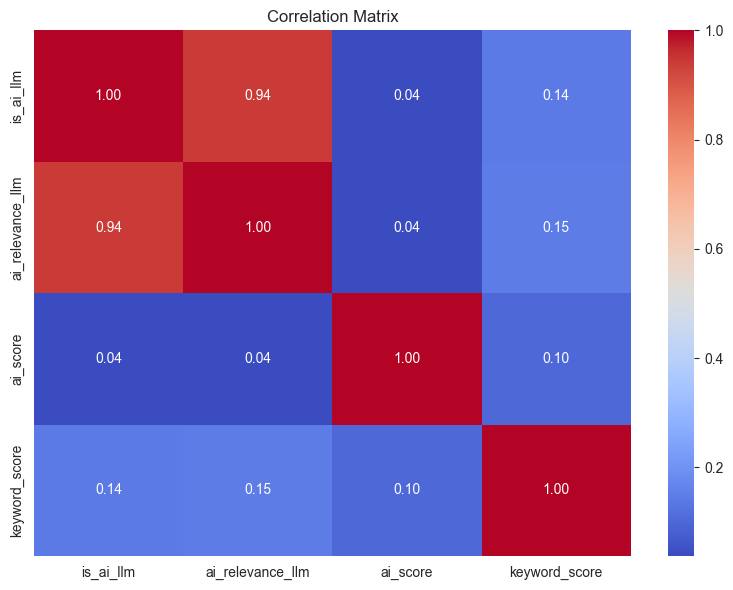

<Figure size 640x480 with 0 Axes>

In [4]:
# correlation matrix of is_ai_llm, ai_relevance_llm, ai_score, keyword_score, ai_barrier_llm_flag
corr_cols = [
    "is_ai_llm",
    "ai_relevance_llm",
    "ai_score",
    "keyword_score",
]
corr_df = df[corr_cols].copy()
corr_matrix = corr_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(FIG_DIR, "12_correlation_matrix.png"), bbox_inches="tight")

In [5]:
# using umap and hdbscan to cluster articles based on their embeddings and see if clusters correspond to ai_llm labels
from umap import UMAP
ai_df = df[df['is_ai_llm']]

emb = np.load("../results/01_embeddings.npy")
# emb select by df orig_index
emb = emb[ai_df["orig_index"].values]

reduced = UMAP(n_neighbors=15, min_dist=0.0, metric="cosine").fit_transform(emb)
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=500, metric='euclidean')
labels = clusterer.fit_predict(reduced)
ai_df["cluster"] = labels


E:\Projects\AI-DK-Media-project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
E:\Projects\AI-DK-Media-project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
E:\Projects\AI-DK-Media-project\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\qswwq\AppData\Local\Temp\ipykernel_28700\3461461651.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

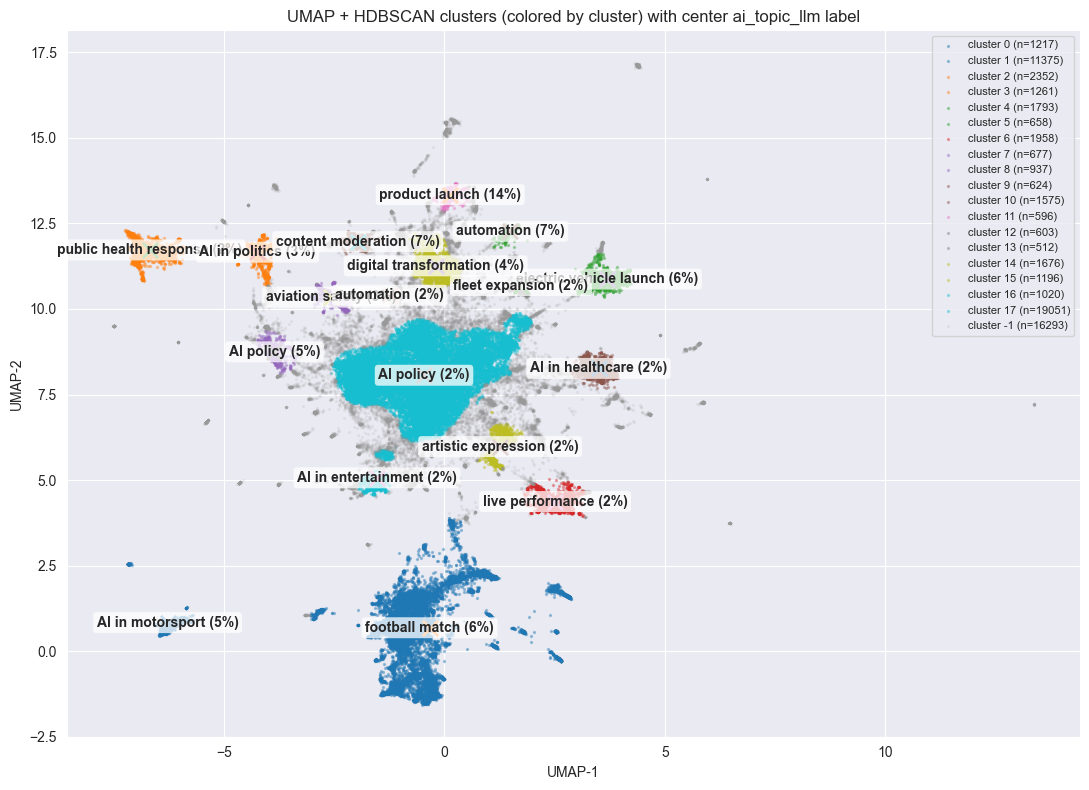

[-1 17 17 ...  1  1 17]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------
# Safety alignment
# -----------------------
ai_df = ai_df.copy().reset_index(drop=True)  # 重要：确保 reduced[i] 对应 ai_df.iloc[i]

CLUSTER_COL = "cluster"
TOPIC_COL = "ai_topic_llm"

assert reduced.shape[0] == len(ai_df), "reduced and ai_df length mismatch"
assert CLUSTER_COL in ai_df.columns, f"missing {CLUSTER_COL}"
assert TOPIC_COL in ai_df.columns, f"missing {TOPIC_COL}"

# -----------------------
# Plot params
# -----------------------
MAX_PTS = 200_000     # 点太多就抽样（60k不用抽也行）
RNG = 42
LABEL_MAX_CHARS = 26  # 标签太长截断
MIN_LABEL_N = 300     # 小簇不标注

N = len(ai_df)
idx = np.arange(N)
if N > MAX_PTS:
    idx = np.random.default_rng(RNG).choice(N, size=MAX_PTS, replace=False)

x = reduced[idx, 0]
y = reduced[idx, 1]
clusters = ai_df.loc[idx, CLUSTER_COL].to_numpy()

# unique clusters (keep -1 last)
uniq = np.unique(ai_df[CLUSTER_COL].to_numpy())
uniq = [c for c in uniq if c != -1] + ([-1] if -1 in uniq else [])

# color map for non-noise clusters
k = len([c for c in uniq if c != -1])
palette = plt.cm.tab10(np.linspace(0, 1, max(k, 3)))
color_map = {}
pi = 0
for c in uniq:
    if c == -1:
        color_map[c] = (0.6, 0.6, 0.6, 0.15)  # noise gray
    else:
        color_map[c] = palette[pi]
        pi += 1

# -----------------------
# Compute cluster centers + majority ai_topic_llm (on FULL data, not just sampled)
# -----------------------
centers = {}
labels_text = {}

for c in uniq:
    m_full = (ai_df[CLUSTER_COL].to_numpy() == c)
    if m_full.sum() == 0:
        continue

    cx = reduced[m_full, 0].mean()
    cy = reduced[m_full, 1].mean()
    centers[c] = (cx, cy)

    # majority topic label
    vc = ai_df.loc[m_full, TOPIC_COL].astype(str).value_counts()
    major = vc.index[0] if len(vc) else ""
    share = float(vc.iloc[0] / vc.sum()) if len(vc) else 0.0

    # shorten
    major2 = major.replace("\n", " ").strip()
    if len(major2) > LABEL_MAX_CHARS:
        major2 = major2[:LABEL_MAX_CHARS] + "…"

    labels_text[c] = f"{major2} ({share:.0%})"

# -----------------------
# Plot
# -----------------------
fig, ax = plt.subplots(figsize=(11, 8))

for c in uniq:
    m = (clusters == c)
    if m.sum() == 0:
        continue
    ax.scatter(
        x[m], y[m],
        s=2,
        alpha=0.35 if c != -1 else 0.10,
        c=[color_map[c]],
        label=f"cluster {c} (n={int((ai_df[CLUSTER_COL]==c).sum())})",
        rasterized=True
    )

ax.set_title("UMAP + HDBSCAN clusters (colored by cluster) with center ai_topic_llm label")
ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")
ax.legend(loc="best", fontsize=8, frameon=True)

# Center labels
for c in uniq:
    n_c = int((ai_df[CLUSTER_COL] == c).sum())
    if c == -1 or n_c < MIN_LABEL_N:
        continue
    cx, cy = centers[c]
    ax.scatter([cx], [cy], marker="x", s=120, linewidths=2)  # center marker
    ax.text(
        cx, cy,
        labels_text[c],
        fontsize=10, weight="bold",
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="none", alpha=0.75)
    )

fig.tight_layout()
fig.savefig("umap_hdbscan_clusters_with_center_topic.png", dpi=300, bbox_inches="tight")
plt.show()
# OUTPUT ALL cluster labels
print(labels)


In [7]:
import pandas as pd

CLUSTER_COL = "ai_relevance_llm"        # 你已存在的聚类列
TOPIC_COL   = "ai_topic_llm"   # 你要看的 topic 列（换成你的 topic 列名）
TOPN = 30                      # 输出前 TOPN 个 topic

# 1) 每个 cluster 的大小
cluster_counts = ai_df[CLUSTER_COL].value_counts(dropna=False)
print("Top clusters by size:")
print(cluster_counts.head(20))

# 2) 最大 cluster（通常是 -1）
n_l = 1
largest_cluster = cluster_counts.index[n_l]
largest_n = int(cluster_counts.iloc[n_l])
print(f"\nLargest cluster = {largest_cluster}, n = {largest_n}")

# 3) 最大 cluster 内部的 topic 分布
sub = ai_df[ai_df[CLUSTER_COL] == largest_cluster].copy()

topic_dist = (
    sub[TOPIC_COL]
    .fillna("NA")
    .astype(str)
    .value_counts()
    .reset_index()
)
topic_dist.columns = [TOPIC_COL, "count"]
topic_dist["share"] = topic_dist["count"] / topic_dist["count"].sum()

print(f"\nTopic distribution inside cluster {largest_cluster} (top {TOPN}):")
print(topic_dist.head(TOPN))

# 可选：保存
topic_dist.to_csv(f"results/topic_dist_cluster_{largest_cluster}.csv", index=False, encoding="utf-8-sig")
print(f"\nSaved: results/topic_dist_cluster_{largest_cluster}.csv")


Top clusters by size:
ai_relevance_llm
90.0     27171
85.0     16930
100.0     9352
10.0      8235
95.0      2446
80.0       704
60.0       251
50.0       204
70.0        31
75.0        18
40.0        10
30.0        10
20.0         4
65.0         3
0.0          2
45.0         1
97.0         1
27.0         1
Name: count, dtype: int64

Largest cluster = 85.0, n = 16930

Topic distribution inside cluster 85.0 (top 30):
               ai_topic_llm  count     share
0                automation    145  0.008565
1    digital transformation    116  0.006852
2          machine learning     89  0.005257
3          team performance     73  0.004312
4            football match     64  0.003780
5            climate policy     60  0.003544
6            product launch     55  0.003249
7        content moderation     52  0.003071
8         urban development     50  0.002953
9         digital education     41  0.002422
10          player transfer     41  0.002422
11     public health policy     39  0.00

In [8]:
count = df['ai_topic_llm'].str.contains('AI', case=False, na=False).sum()
print(count)

15146


In [9]:
df.columns

Index(['plain_text', 'published_date', 'title', 'tags', 'categories', 'author',
       'sitename', 'publisher', 'orig_index', 'is_ai_llm', 'ai_relevance_llm',
       'ai_topic_llm', 'ai_barrier_llm', 'ai_barrier_type_llm',
       'ai_barrier_summary_llm', 'ai_score', 'keyword_score', 'year',
       'is_ai_llm_flag', 'is_ai_flag', 'ai_barrier_llm_flag'],
      dtype='object')

[INFO] PCA to 50 dims on sample...
[INFO] Computing inertia for K: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
  k=   1 inertia=2.017e+04
  k=   2 inertia=1.893e+04
  k=   3 inertia=1.800e+04
  k=   4 inertia=1.695e+04
  k=   5 inertia=1.634e+04
  k=   6 inertia=1.580e+04
  k=   7 inertia=1.534e+04
  k=   8 inertia=1.496e+04
  k=   9 inertia=1.456e+04
  k=  10 inertia=1.439e+04
  k=  11 inertia=1.413e+04
  k=  12 inertia=1.403e+04
  k=  13 inertia=1.388e+04
  k=  14 inertia=1.374e+04
  k=  15 inertia=1.356e+04
  k=  16 inertia=1.338e+04
  k=  17 inertia=1.319e+04
  k=  18 inertia=1.309e+04
  k=  19 inertia=1.295e+04
  k=  20 inertia=1.284e+04
  k=  21 inertia=1.284e+04
  k=  22 inertia=1.279e+04
  k=  23 inertia=1.272e+04
  k=  24 inertia=1.260e+04
  k=  25 inertia=1.257e+04
  k=  26 inertia=1.251e+04
  k=  27 inertia=1.235e+04
  k=  28 inertia

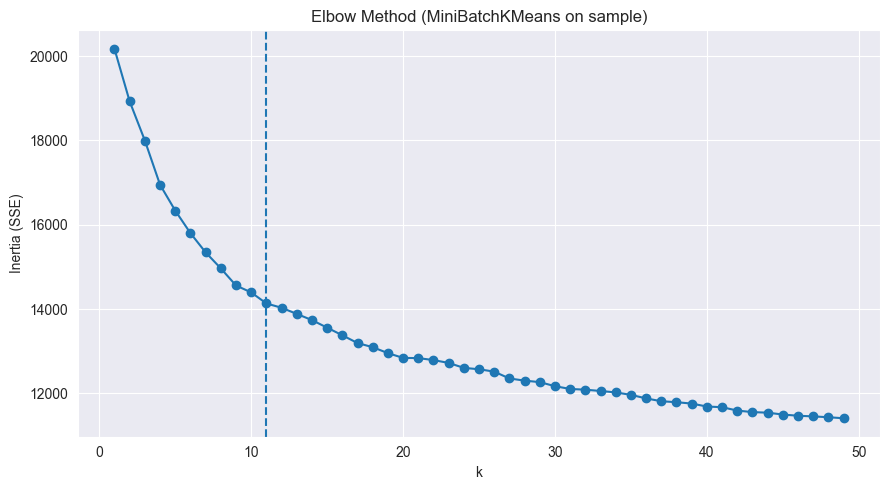

[OK] Saved plot: kmeans_elbow.png
[INFO] Transform full embeddings with PCA...
[INFO] Fitting final MiniBatchKMeans with k=11 on full data (N=65374)...

Top cluster sizes:
cluster_kmeans
9     14543
7      6428
8      6192
10     6008
1      5565
3      5340
6      4970
2      4678
5      4584
0      4041
4      3025
Name: count, dtype: int64

Smallest cluster sizes:
cluster_kmeans
9     14543
7      6428
8      6192
10     6008
1      5565
3      5340
6      4970
2      4678
5      4584
0      4041
4      3025
Name: count, dtype: int64

[OK] Saved labels: results/kmeans_cluster_labels.csv


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA

# =========================
# CONFIG
# =========================
RNG = 42
SAMPLE_N = 200_000          # elbow computed on sample (increase if you can)
USE_PCA = True
PCA_DIM = 50                # good default for SBERT embeddings
K_LIST = list(range(1, 50, 1))  # try 20..500 step 20; adjust for your scale
BATCH_SIZE = 8192

FINAL_COL = "cluster_kmeans"

assert len(ai_df) == emb.shape[0], "ai_df and emb must be aligned (same N)"
ai_df = ai_df.reset_index(drop=True)

# =========================
# 1) Normalize embeddings (cosine-friendly)
# =========================
emb = np.asarray(emb, dtype=np.float32)
emb_norm = emb / (np.linalg.norm(emb, axis=1, keepdims=True) + 1e-12)

N = emb_norm.shape[0]
n_s = min(SAMPLE_N, N)
idx = np.random.default_rng(RNG).choice(N, size=n_s, replace=False)
X_s = emb_norm[idx]

# Optional PCA for speed/stability
if USE_PCA:
    print(f"[INFO] PCA to {PCA_DIM} dims on sample...")
    pca = PCA(n_components=PCA_DIM, random_state=RNG)
    X_s_pca = pca.fit_transform(X_s)
else:
    pca = None
    X_s_pca = X_s

# =========================
# 2) Elbow curve (inertia vs k)
# =========================
inertias = []
print("[INFO] Computing inertia for K:", K_LIST)
for k in K_LIST:
    km = MiniBatchKMeans(
        n_clusters=k,
        random_state=RNG,
        batch_size=BATCH_SIZE,
        n_init="auto"
    )
    km.fit(X_s_pca)
    inertias.append(float(km.inertia_))
    print(f"  k={k:4d} inertia={inertias[-1]:.3e}")

# =========================
# 3) Auto elbow detection (max distance to line)
#    Works well on log(inertia).
# =========================
ks = np.array(K_LIST, dtype=float)
ys = np.log(np.array(inertias, dtype=float))

# line between first and last point
p1 = np.array([ks[0], ys[0]])
p2 = np.array([ks[-1], ys[-1]])

# distance from each point to the line (normalized)
# formula: |(p2-p1)x(p1-p)| / ||p2-p1||
v = p2 - p1
v_norm = np.linalg.norm(v) + 1e-12

dists = []
for k, y in zip(ks, ys):
    p = np.array([k, y])
    # 2D cross product magnitude
    cross = abs(v[0]*(p1[1]-p[1]) - v[1]*(p1[0]-p[0]))
    dists.append(cross / v_norm)

dists = np.array(dists)
best_i = int(np.argmax(dists))
best_k = int(ks[best_i])

print(f"\n[OK] Auto-elbow K = {best_k} (index={best_i})")

# Plot elbow
plt.figure(figsize=(9, 5))
plt.plot(K_LIST, inertias, marker="o")
plt.title("Elbow Method (MiniBatchKMeans on sample)")
plt.xlabel("k")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.axvline(best_k, linestyle="--")
plt.tight_layout()
plt.savefig("kmeans_elbow.png", dpi=300, bbox_inches="tight")
plt.show()
print("[OK] Saved plot: kmeans_elbow.png")

# =========================
# 4) Fit FINAL KMeans on ALL data
# =========================
if USE_PCA:
    print("[INFO] Transform full embeddings with PCA...")
    X_full = pca.transform(emb_norm)
else:
    X_full = emb_norm

print(f"[INFO] Fitting final MiniBatchKMeans with k={best_k} on full data (N={N})...")
final_km = MiniBatchKMeans(
    n_clusters=best_k,
    random_state=RNG,
    batch_size=BATCH_SIZE,
    n_init="auto"
)
labels_full = final_km.fit_predict(X_full)

ai_df[FINAL_COL] = labels_full

# Cluster size summary
sizes = ai_df[FINAL_COL].value_counts().sort_values(ascending=False)
print("\nTop cluster sizes:")
print(sizes.head(20))
print("\nSmallest cluster sizes:")
print(sizes.tail(20))

# Optional: save
ai_df[[FINAL_COL]].to_csv("results/kmeans_cluster_labels.csv", index=False)
print("\n[OK] Saved labels: results/kmeans_cluster_labels.csv")


Plotting Top-30 clusters: 65374 / 65374 (100.00%)


C:\Users\qswwq\AppData\Local\Temp\ipykernel_28700\2331364797.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20", len(cats)) if len(cats) <= 20 else plt.cm.get_cmap("gist_ncar", len(cats))


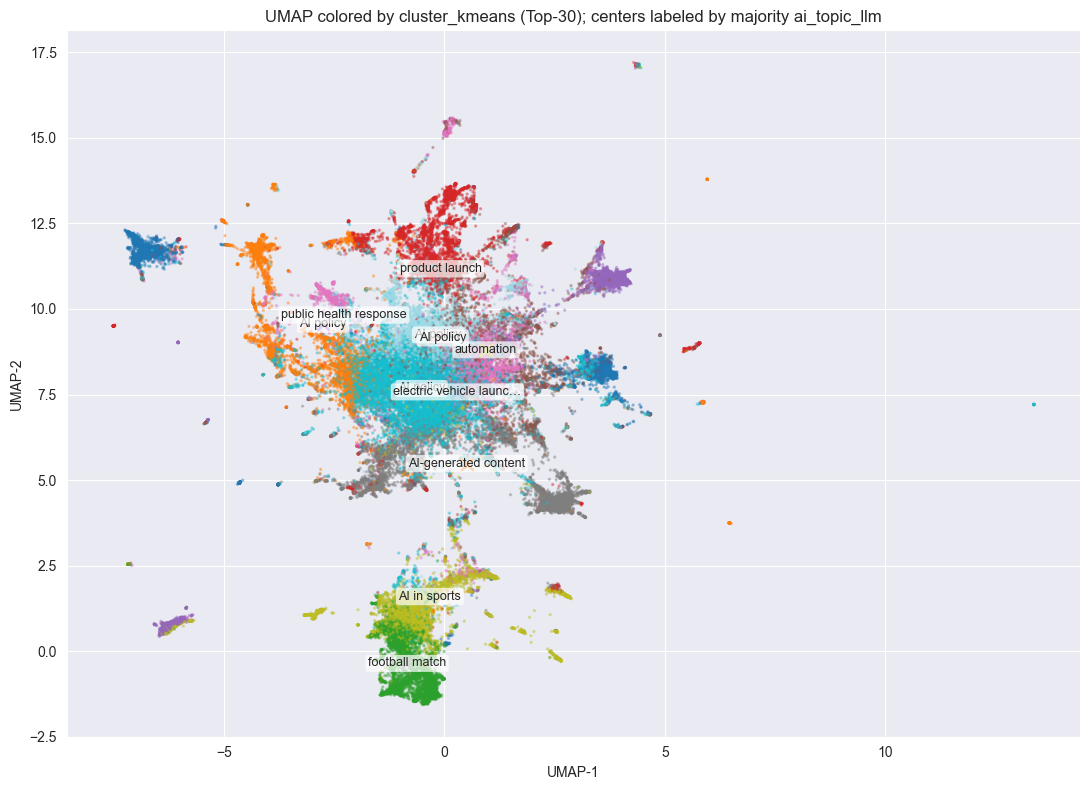

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------
# CONFIG
# -------------------
CLUSTER_COL = "cluster_kmeans"
TOPIC_COL   = "ai_topic_llm"

MAX_PTS = 200_000      # 散点抽样数（太大容易卡）
TOPK_PLOT = 30         # 只画最大的 Top-K 个簇（其余不画）——强烈推荐，否则太乱
TOPK_LABEL = 30        # 标注多少个簇的中心（建议与 TOPK_PLOT 一致）
MIN_LABEL_N = 200      # 小簇不标注（避免文字挤爆）
LABEL_MAX_CHARS = 22   # 标注文本截断长度

RNG = 42

# -------------------
# sanity
# -------------------
assert len(ai_df) == reduced.shape[0], "ai_df and reduced must align"
assert CLUSTER_COL in ai_df.columns, f"Missing {CLUSTER_COL}"
assert TOPIC_COL in ai_df.columns, f"Missing {TOPIC_COL}"

ai_df = ai_df.reset_index(drop=True)

# -------------------
# 1) pick Top-K clusters to plot (optional but recommended)
# -------------------
sizes = ai_df[CLUSTER_COL].value_counts()
top_clusters = sizes.head(TOPK_PLOT).index.to_numpy()

mask_top = ai_df[CLUSTER_COL].isin(top_clusters).to_numpy()
idx_all = np.where(mask_top)[0]
print(f"Plotting Top-{TOPK_PLOT} clusters: {len(idx_all)} / {len(ai_df)} ({len(idx_all)/len(ai_df):.2%})")

# sample only from selected clusters
idx = np.random.default_rng(RNG).choice(idx_all, size=min(MAX_PTS, len(idx_all)), replace=False)

x = reduced[idx, 0]
y = reduced[idx, 1]
c = ai_df.loc[idx, CLUSTER_COL].to_numpy()

# -------------------
# 2) compute cluster centers on FULL selected data (not just sample)
# -------------------
sub = ai_df.loc[idx_all, [CLUSTER_COL, TOPIC_COL]].copy()
sub["x"] = reduced[idx_all, 0]
sub["y"] = reduced[idx_all, 1]

# center (mean in reduced space)
centers = sub.groupby(CLUSTER_COL)[["x", "y"]].mean()

# majority ai_topic_llm per cluster (mode)
major_topic = (
    sub.groupby(CLUSTER_COL)[TOPIC_COL]
       .agg(lambda s: s.astype(str).value_counts().idxmax() if len(s) else "")
)

center_df = centers.join(major_topic.rename("major_topic"))
center_df["n_docs"] = sizes.loc[center_df.index].astype(int).values
center_df = center_df.sort_values("n_docs", ascending=False)

# choose which clusters to label
label_clusters = center_df.head(TOPK_LABEL).index.to_numpy()

# -------------------
# 3) plot
# -------------------
fig, ax = plt.subplots(figsize=(11, 8))

# Use categorical codes for coloring (works even if cluster ids are big numbers)
cat = pd.Series(c).astype("category")
codes = cat.cat.codes.to_numpy()
cats  = cat.cat.categories.to_numpy()

# discrete colormap with enough bins for TOPK_PLOT
cmap = plt.cm.get_cmap("tab20", len(cats)) if len(cats) <= 20 else plt.cm.get_cmap("gist_ncar", len(cats))

sc = ax.scatter(
    x, y,
    c=codes,
    s=2,
    alpha=0.35,
    cmap=cmap,
    rasterized=True
)

ax.set_title(f"UMAP colored by {CLUSTER_COL} (Top-{TOPK_PLOT}); centers labeled by majority {TOPIC_COL}")
ax.set_xlabel("UMAP-1")
ax.set_ylabel("UMAP-2")

# plot centers + labels
for cid in label_clusters:
    row = center_df.loc[cid]
    if row["n_docs"] < MIN_LABEL_N:
        continue

    cx, cy = row["x"], row["y"]
    topic = str(row["major_topic"]).strip().replace("\n", " ")
    if len(topic) > LABEL_MAX_CHARS:
        topic = topic[:LABEL_MAX_CHARS] + "…"

    ax.scatter([cx], [cy], marker="x", s=80, linewidths=2)  # center mark
    ax.text(
        cx, cy,
        f"{topic}",
        fontsize=9,
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)
    )

fig.tight_layout()
fig.savefig("umap_kmeans_clusters_labeled_by_ai_topic_llm.png", dpi=300, bbox_inches="tight")
plt.show()


In [12]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17])

In [13]:
# 1) 先写入数值簇标签
ai_df["cluster"] = labels

# 2) 计算每个簇里出现最多的 ai_topic_llm（这就是你图里 labels_text 的逻辑）
cluster_to_topic = (
    ai_df.groupby("cluster")["ai_topic_llm"]
        .agg(lambda s: s.fillna("NA").astype(str).value_counts().idxmax())
)

# 3) 用这个“中心 topic”替换 cluster 列
ai_df["cluster"] = ai_df["cluster"].map(cluster_to_topic)

# 4) （可选）如果你想让噪声保持为 -1，而不是被替换成某个 topic，就加这一行
#     放在 map 之后，因为 map 会把 -1 也替换掉
ai_df.loc[labels == -1, "cluster"] = -1


In [14]:
cluster_to_topic
# ouput a random plain text from cluster 1


cluster
-1                   AI policy
 0            AI in motorsport
 1              football match
 2      public health response
 3              AI in politics
 4     electric vehicle launch
 5                  automation
 6            live performance
 7                   AI policy
 8             aviation safety
 9          content moderation
 10           AI in healthcare
 11             product launch
 12            fleet expansion
 13                 automation
 14     digital transformation
 15        artistic expression
 16        AI in entertainment
 17                  AI policy
Name: ai_topic_llm, dtype: object

In [15]:
CLUSTER_COL = "cluster"
TEXT_COL = "plain_text"
TITLE_COL = "title"            # 没有就删掉
DATE_COL = "published_date"    # 没有就删掉

TARGET_CLUSTER = 'AI policy'          # <<< 改这里：例如 -1 或 "policy" 等
condition = ai_df['keyword_score']>1
sub = ai_df[(ai_df[CLUSTER_COL] == TARGET_CLUSTER)&condition]
print("cluster =", TARGET_CLUSTER, "n =", len(sub))

if len(sub) == 0:
    print("No rows in this cluster.")
else:
    i = np.random.default_rng(np.random.randint(0,100)).choice(sub.index, size=1)[0]
    row = ai_df.loc[i]

    # 可选：打印元信息
    if TITLE_COL in ai_df.columns:
        print("\nTITLE:", row[TITLE_COL])
    if DATE_COL in ai_df.columns:
        print("DATE :", row[DATE_COL])
    print("INDEX:", i)

    # 输出正文
    print("\nPLAIN_TEXT:\n")
    print(str(row[TEXT_COL]))
    print(row)

cluster = AI policy n = 53

TITLE: Ikke alle efteruddannelser pynter på lønsedlen
DATE : 2017-06-13 00:00:00
INDEX: 437

PLAIN_TEXT:

Flere AMU-kurser har tjent sig selv hjem efter tre år, mens andre ikke har nogen effekt, viser ny analyse.  Det pynter på lønsedlen, beskæftigelsen og jobmobiliteten, når medarbejdere deltager i diplomkurser, akademikurser og nogle typer AMU-kurser. Men ikke alle kurser giver den ønskede effekt. Det viser en effektanalyse, som Det Nationale Institut for Kommuners og Regioners Analyse og Forskning, KORA, har lavet for Undervisningsministeriet.  - Med analysen kan vi komme nærmere, hvilke voksen- og efteruddannelsesindsatser det offentlige har en særlig forpligtelse til at løfte, siger undervisningsminister Merete Riisager (LA) i en pressemeddelelse. - Det kan være i forhold til den enkeltes løn, jobmobilitet eller noget helt tredje. Vi har brug for et solidt grundlag, når trepartsforhandlingerne om kort tid går i gang. Analysen er den største, der hidtil 

In [16]:
row

plain_text                Flere AMU-kurser har tjent sig selv hjem efter...
published_date                                          2017-06-13 00:00:00
title                        Ikke alle efteruddannelser pynter på lønsedlen
tags                                                                    NaN
categories                                                              NaN
author                                                            Af Ritzau
sitename                                                       Sndk_Nyheder
publisher                                                             sn.dk
orig_index                                                            39365
is_ai_llm                                                              True
ai_relevance_llm                                                       85.0
ai_topic_llm                                         adult education impact
ai_barrier_llm                                                        False
ai_barrier_t

In [17]:
# 列名里有空格的话用这种写法
CLUSTER_COL = "cluster"
KEYWORD_COL = "keyword_score"   # <<< 这里换成你真实的 keyword score 列名（看你写法像有空格）

# 1) 每个 cluster 的 keyword_score 均值
cluster_kw = (
    ai_df.groupby(CLUSTER_COL)[KEYWORD_COL]
         .mean()
         .sort_values(ascending=False)
)

# 2) 最大均值的 cluster
best_cluster = cluster_kw.index[0]
best_mean = cluster_kw.iloc[0]

print("Best cluster by mean keyword score:")
print("cluster =", best_cluster, "mean_keyword_score =", best_mean)

# 3) 可选：把 top 20 打出来
print("\nTop 20 clusters:")
print(cluster_kw.head(20))


Best cluster by mean keyword score:
cluster = automation mean_keyword_score = 0.5205128205128206

Top 20 clusters:
cluster
automation                 0.520513
content moderation         0.214744
digital transformation     0.162291
product launch             0.102349
-1                         0.063892
AI in healthcare           0.044444
AI in entertainment        0.035294
AI in politics             0.028549
electric vehicle launch    0.028444
artistic expression        0.027592
fleet expansion            0.024876
live performance           0.019408
AI policy                  0.017944
public health response     0.016582
aviation safety            0.014941
football match             0.004484
AI in motorsport           0.003287
Name: keyword_score, dtype: float64


In [18]:
# 列名里有空格的话用这种写法
CLUSTER_COL = "cluster"
KEYWORD_COL = "keyword_score"   # <<< 这里换成你真实的 keyword score 列名（看你写法像有空格）

# 1) 每个 cluster 的 keyword_score 均值
cluster_kw = (
    ai_df.groupby(CLUSTER_COL)[KEYWORD_COL]
         .mean()
         .sort_values(ascending=False)
)

# 2) 最大均值的 cluster
best_cluster = cluster_kw.index[0]
best_mean = cluster_kw.iloc[0]

print("Best cluster by mean keyword score:")
print("cluster =", best_cluster, "mean_keyword_score =", best_mean)

# 3) 可选：把 top 20 打出来
print("\nTop 20 clusters:")
print(cluster_kw)

# output total rows that cluster by key_score>0.014
target_cluster = [x for x in cluster_kw.index if cluster_kw[x]>0.014]
print(target_cluster)
# locate rows in ai_df that belong to target_cluster
sub = ai_df[ai_df['cluster'].isin(target_cluster)]
sub.shape




Best cluster by mean keyword score:
cluster = automation mean_keyword_score = 0.5205128205128206

Top 20 clusters:
cluster
automation                 0.520513
content moderation         0.214744
digital transformation     0.162291
product launch             0.102349
-1                         0.063892
AI in healthcare           0.044444
AI in entertainment        0.035294
AI in politics             0.028549
electric vehicle launch    0.028444
artistic expression        0.027592
fleet expansion            0.024876
live performance           0.019408
AI policy                  0.017944
public health response     0.016582
aviation safety            0.014941
football match             0.004484
AI in motorsport           0.003287
Name: keyword_score, dtype: float64
['automation', 'content moderation', 'digital transformation', 'product launch', -1, 'AI in healthcare', 'AI in entertainment', 'AI in politics', 'electric vehicle launch', 'artistic expression', 'fleet expansion', 'live performa

(52782, 23)

In [19]:
CLUSTER_COL = "cluster"
KEYWORD_COL = "ai_score"   # <<< 这里换成你真实的 keyword score 列名（看你写法像有空格）

# 1) 每个 cluster 的 keyword_score 均值
cluster_kw = (
    sub.groupby(CLUSTER_COL)[KEYWORD_COL]
         .mean()
         .sort_values(ascending=False)
)

# 2) 最大均值的 cluster
best_cluster = cluster_kw.index[0]
best_mean = cluster_kw.iloc[0]

print("Best cluster by mean embedding similarity score :")
print("cluster =", best_cluster, "mean_similarity_score =", best_mean)

# 3) 可选：把 top 20 打出来
print("\nTop 20 clusters:")
print(cluster_kw)

# output total rows that cluster by key_score>0.014
target_cluster = [x for x in cluster_kw.index if cluster_kw[x]>0.267]
print(target_cluster)
# locate rows in ai_df that belong to target_cluster
sub2 = ai_df[ai_df['cluster'].isin(target_cluster)]
sub2.shape

Best cluster by mean embedding similarity score :
cluster = automation mean_similarity_score = 0.3955590618205128

Top 20 clusters:
cluster
automation                 0.395559
digital transformation     0.354192
AI policy                  0.315226
electric vehicle launch    0.309146
content moderation         0.306879
artistic expression        0.303762
-1                         0.298060
AI in healthcare           0.287290
fleet expansion            0.283694
AI in entertainment        0.272428
aviation safety            0.269851
AI in politics             0.266324
product launch             0.261875
live performance           0.256316
public health response     0.246098
Name: ai_score, dtype: float64
['automation', 'digital transformation', 'AI policy', 'electric vehicle launch', 'content moderation', 'artistic expression', -1, 'AI in healthcare', 'fleet expansion', 'AI in entertainment', 'aviation safety']


(46615, 23)

In [27]:
df1 = pd.read_csv("../results/selected_30B_0.csv")
df2 = pd.read_csv("../results/selected_30B_1.csv")
df3 = pd.read_csv("../results/selected_30B_2.csv")
df4 = pd.read_csv("../results/selected_30B_3.csv")
ai_df_30b = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)
# drop duplicate orig_index row in df
ai_df_30b.drop_duplicates(subset='orig_index',inplace=True)

industries_llm
none                                 40479
transport                              973
healthcare                             836
defense                                345
manufacturing                          319
                                     ...  
Steno Diabetes Center Odense, OUH        1
Dianalund                                1
Fjord & Bælt                             1
Japan                                    1
Sæby, Frederikshavn                      1
Name: count, Length: 1667, dtype: int64

In [38]:
# industries_llm need to be onehot tab separated
from sklearn.preprocessing import MultiLabelBinarizer
def onehot_multilabel(df, column_name, separator='\t'):
    # Split the multi-label strings into lists
    df[column_name] = df[column_name].fillna('none')
    label_lists = df[column_name].apply(lambda x: x.split(separator) if x != 'none' else [])

    # Initialize MultiLabelBinarizer
    mlb = MultiLabelBinarizer()

    # Fit and transform the label lists
    onehot_encoded = mlb.fit_transform(label_lists)

    # Create a DataFrame with the one-hot encoded columns
    onehot_df = pd.DataFrame(onehot_encoded, columns=[f"{column_name}_{cls}" for cls in mlb.classes_])

    # Concatenate the original DataFrame with the one-hot encoded DataFrame
    result_df = pd.concat([df.reset_index(drop=True), onehot_df.reset_index(drop=True)], axis=1)

    return result_df
ai_df_30b = onehot_multilabel(ai_df_30b, 'industries_llm', separator=',')
print(ai_df_30b.columns)

Index(['plain_text', 'published_date', 'title', 'tags', 'categories', 'author',
       'sitename', 'publisher', 'orig_index', 'is_ai_llm',
       ...
       'industries_llm_Århus', 'industries_llm_Årslev', 'industries_llm_Ærø',
       'industries_llm_Ærøskøbing', 'industries_llm_Öland',
       'industries_llm_Ørbæk', 'industries_llm_Ørestad',
       'industries_llm_Ørestaden', 'industries_llm_Ørum',
       'industries_llm_Østerbro'],
      dtype='object', length=1852)


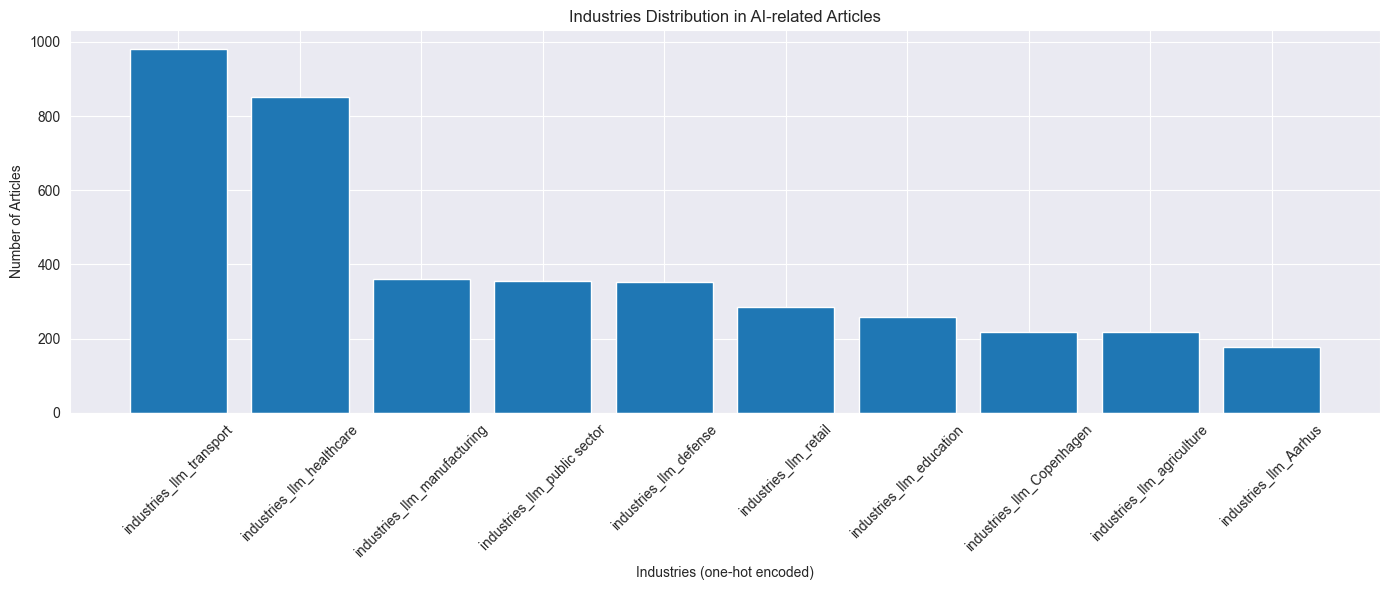

In [41]:
# distribution of to industries_llm in ai_df_30b
industry_cols = [col for col in ai_df_30b.columns if col.startswith('industries_llm_')]
industry_sums = ai_df_30b[industry_cols].sum().sort_values(ascending=False)
# select top 10 industries
industry_sums = industry_sums.head(10)

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(industry_sums.index, industry_sums.values)
ax.set_title("Industries Distribution in AI-related Articles")
ax.set_xlabel("Industries (one-hot encoded)")
ax.set_ylabel("Number of Articles")
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()



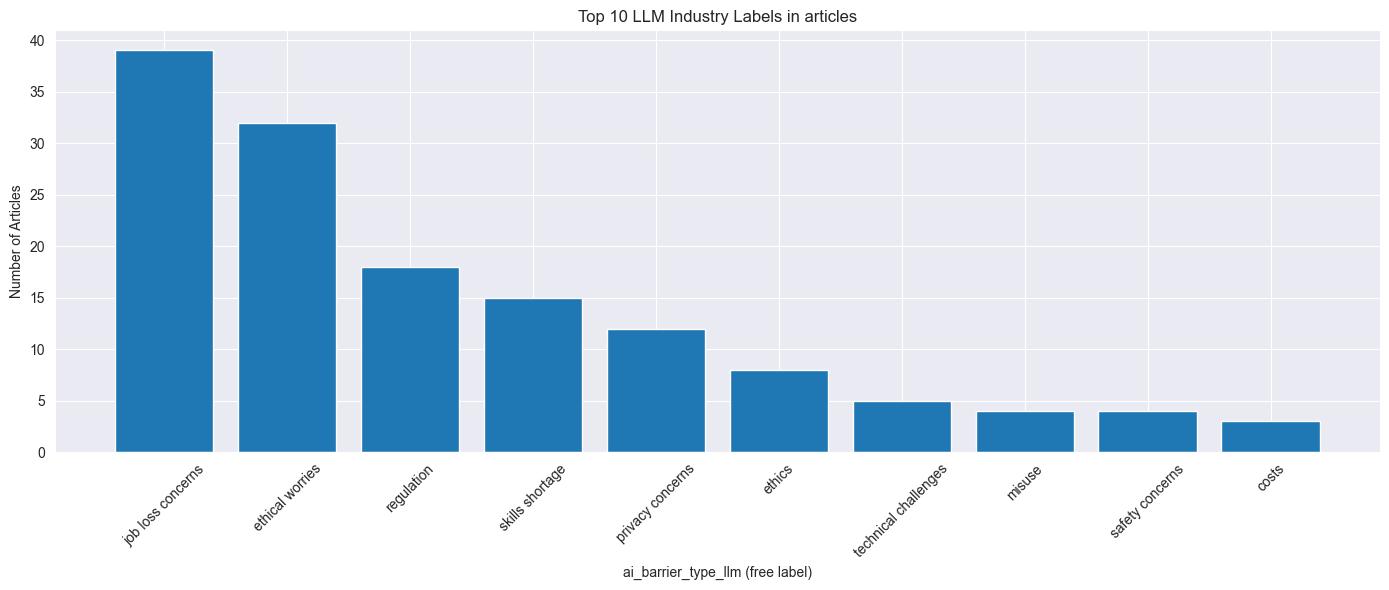

<Figure size 640x480 with 0 Axes>

In [36]:
import re
import matplotlib.pyplot as plt

# 1) collect industry one-hot columns
industry_cols = [c for c in ai_df_30b.columns if c.startswith("industries_llm_")]

# 2) define "city noise" patterns (extend as you discover more)
CITY_PATTERNS = [
    r"copenhagen", r"københavn",
    r"aarhus", r"å?rhus",
    r"odense", r"aalborg", r"å?lborg",
    r"frederiksberg", r"esbjerg", r"randers",
    r"danmark", r"denmark",  # sometimes country sneaks in
]

city_re = re.compile(r"(?:^industries_llm_)(?:" + "|".join(CITY_PATTERNS) + r")$", re.IGNORECASE)

# 3) keep only non-city industry columns
industry_cols_clean = [c for c in industry_cols if not city_re.search(c)]

# 4) aggregate and plot
industry_sums = ai_df_30b[industry_cols_clean].sum().sort_values(ascending=False)

# select top 10 industries
industry_sums = industry_sums.head(10)

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(industry_sums.index, industry_sums.values)
ax.set_title("Industries Distribution in AI-related Articles (City noise removed)")
ax.set_xlabel("Industries (one-hot encoded)")
ax.set_ylabel("Number of Articles")
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()


C:\Users\qswwq\AppData\Local\Temp\ipykernel_28700\3651288786.py:31: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  ind_mat = ind_mat.groupby(level=0, axis=1).sum()


Duplicated industry labels (after normalization):
agriculture    3
energy         3
hirtshals      2
hjallese       2
hjørring       2
              ..
abu dhabi      2
addis ababa    2
ørbæk          2
ørestad        2
østerbro       2
Name: count, Length: 272, dtype: int64


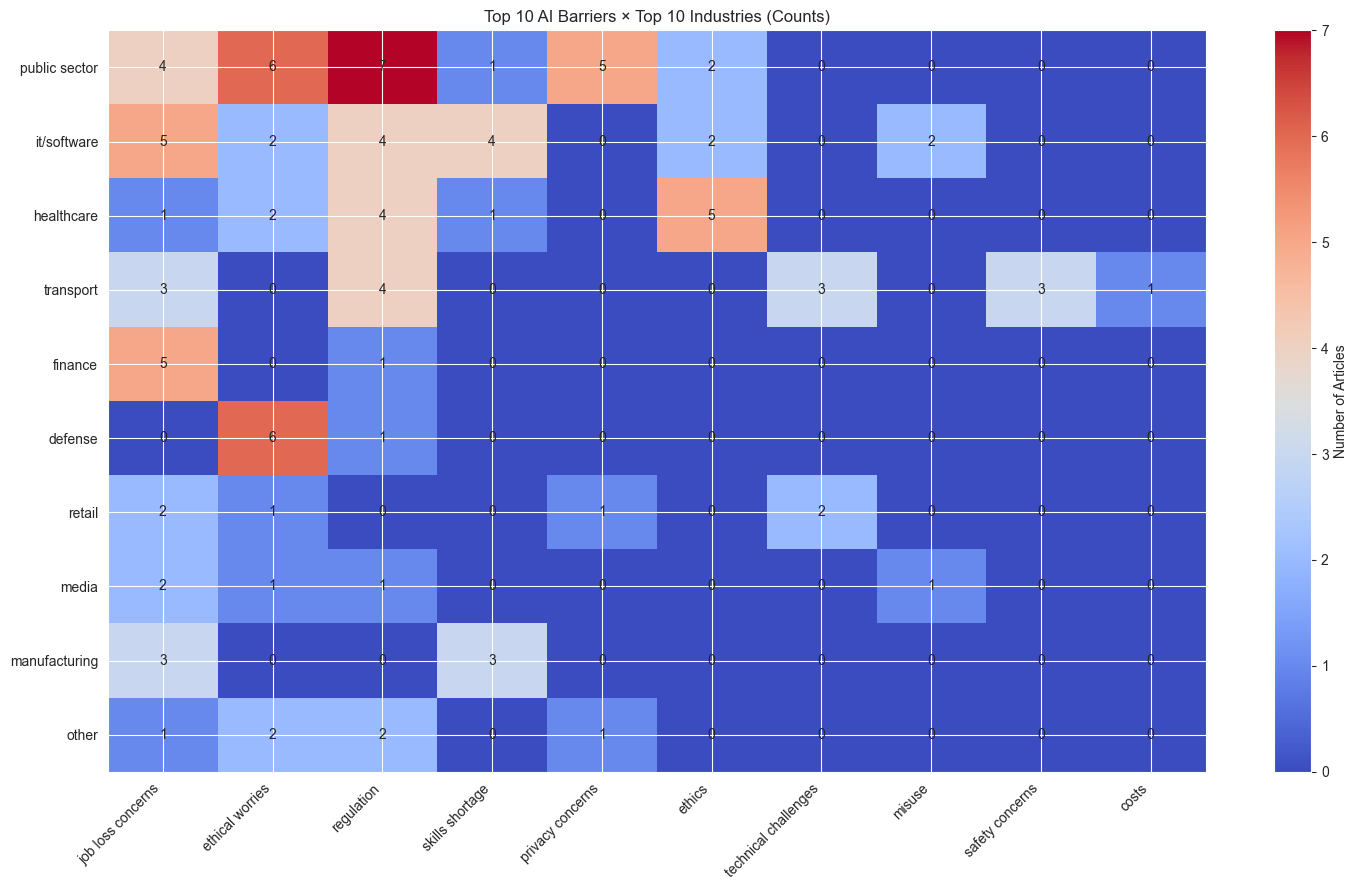

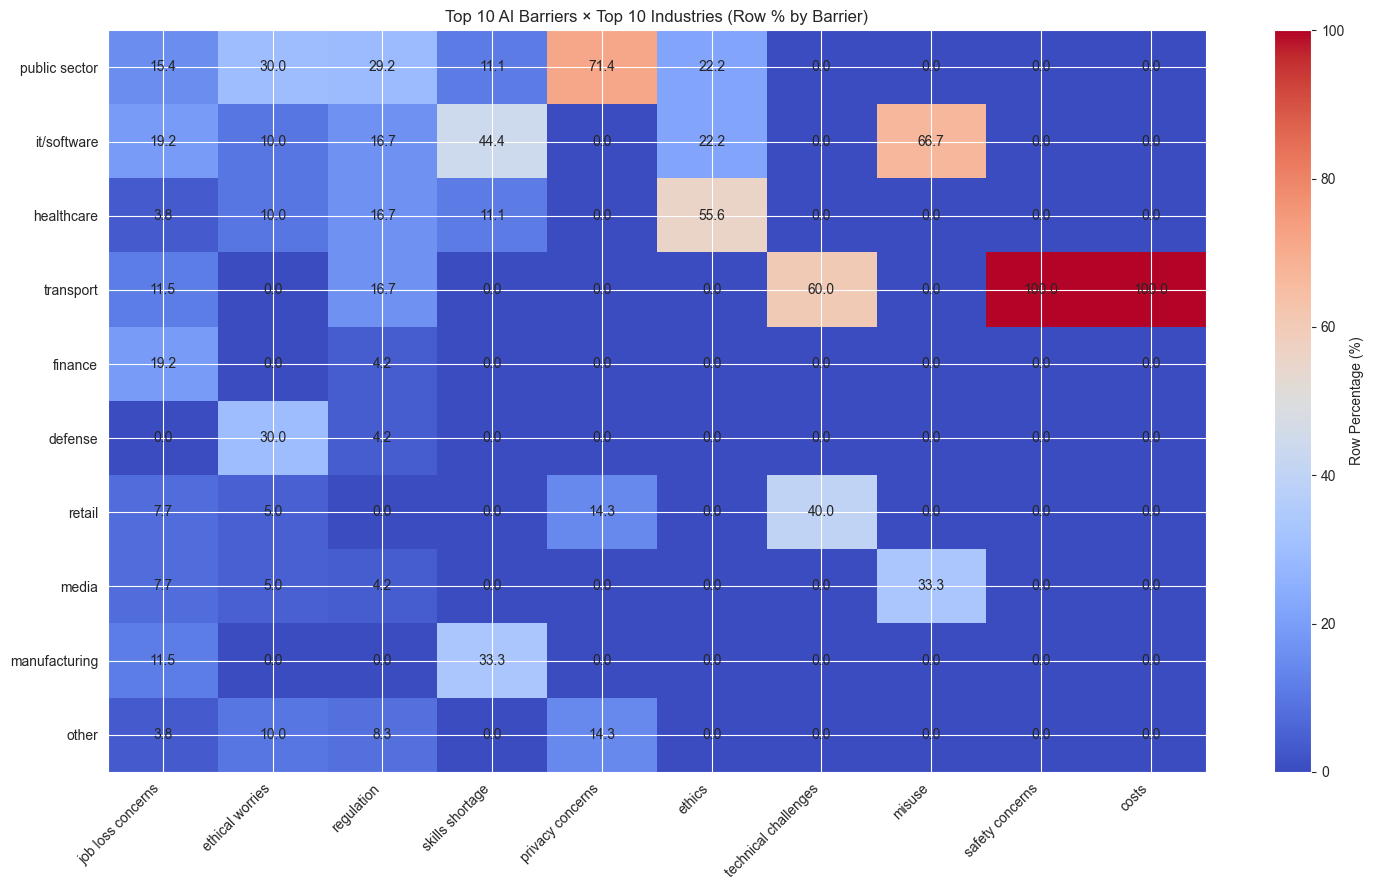

In [48]:
industry_df = ai_df_30b[ai_df_30b['ai_barrier_type_llm']!='none']
if "ai_barrier_type_llm" in industry_df.columns:
    industry_counts = (
        industry_df["ai_barrier_type_llm"]
        .astype(str)
        .str.strip()
        .replace("", np.nan)
        .dropna()
        .value_counts()
        .reset_index()
    )
    industry_counts.columns = ["ai_barrier_type_llm", "count"]

    TOP_N_INDUSTRIES = 10
    industry_counts_top = industry_counts.head(TOP_N_INDUSTRIES)

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.bar(industry_counts_top["ai_barrier_type_llm"], industry_counts_top["count"])
    ax.set_title(f"Top {TOP_N_INDUSTRIES} LLM Industry Labels in articles")
    ax.set_xlabel("ai_barrier_type_llm (free label)")
    ax.set_ylabel("Number of Articles")
    ax.tick_params(axis="x", rotation=45)
    plt.tight_layout()
    plt.show()
    out_path = os.path.join(FIG_DIR, "13_ai_barrier_type_llm_distribution_30B.png")
    plt.savefig(out_path, dpi=300)

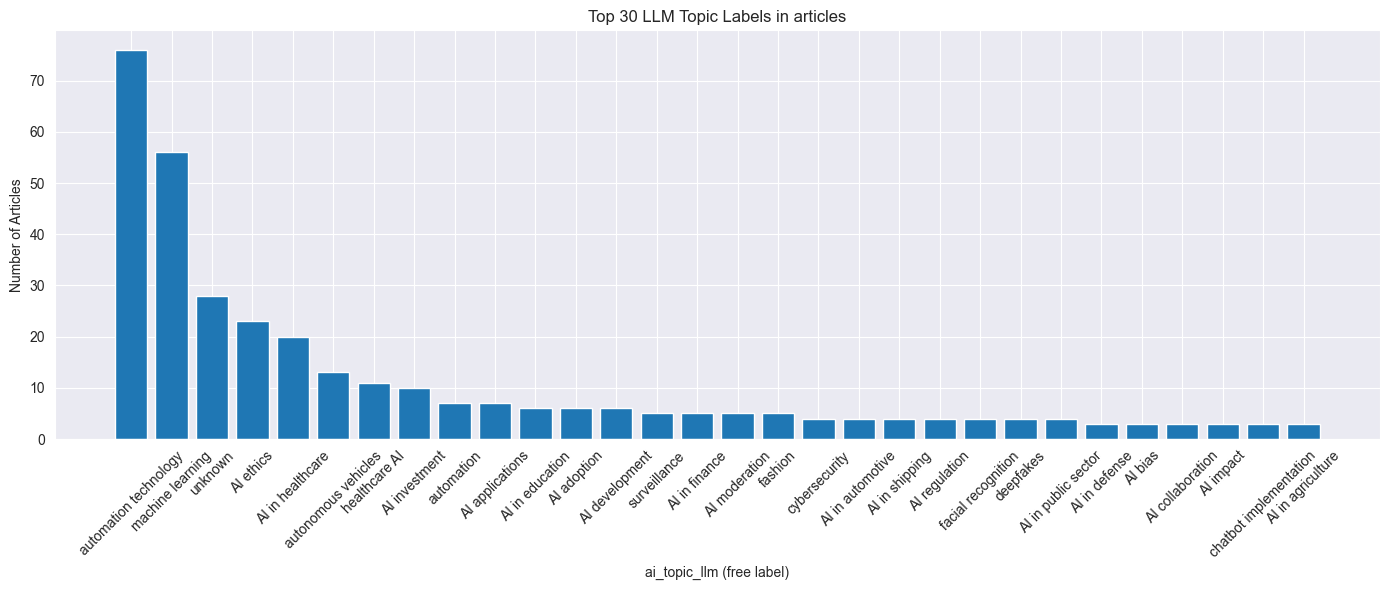

<Figure size 640x480 with 0 Axes>

In [51]:
# distribution of ai_topic_llm in ai_df_30b
t_df = ai_df_30b[ai_df_30b['ai_topic_llm']!='none']
if "ai_topic_llm" in t_df.columns:
    topic_counts = (
        t_df["ai_topic_llm"]
        .astype(str)
        .str.strip()
        .replace("", np.nan)
        .dropna()
        .value_counts()
        .reset_index()
    )
    topic_counts.columns = ["ai_topic_llm", "count"]

    TOP_N_TOPICS = 30
    topic_counts_top = topic_counts.head(TOP_N_TOPICS)

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.bar(topic_counts_top["ai_topic_llm"], topic_counts_top["count"])
    ax.set_title(f"Top {TOP_N_TOPICS} LLM Topic Labels in articles")
    ax.set_xlabel("ai_topic_llm (free label)")
    ax.set_ylabel("Number of Articles")
    ax.tick_params(axis="x", rotation=45)
    plt.tight_layout()
    plt.show()
    out_path = os.path.join(FIG_DIR, "14_ai_topic_llm_distribution_30B.png")
    plt.savefig(out_path, dpi=300)

In [52]:
# onehot cities_llm
ai_df_30b = onehot_multilabel(ai_df_30b, 'cities_llm', separator=',')

C:\Users\qswwq\AppData\Local\Temp\ipykernel_28700\3776265448.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["orig_index"] = pd.to_numeric(df["orig_index"], errors="coerce").astype("Int64")
C:\Users\qswwq\AppData\Local\Temp\ipykernel_28700\3776265448.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ai_score"] = df["orig_index"].map(ai_score_s)
C:\Users\qswwq\AppData\Local\Temp\ipykernel_28700\3776265448.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

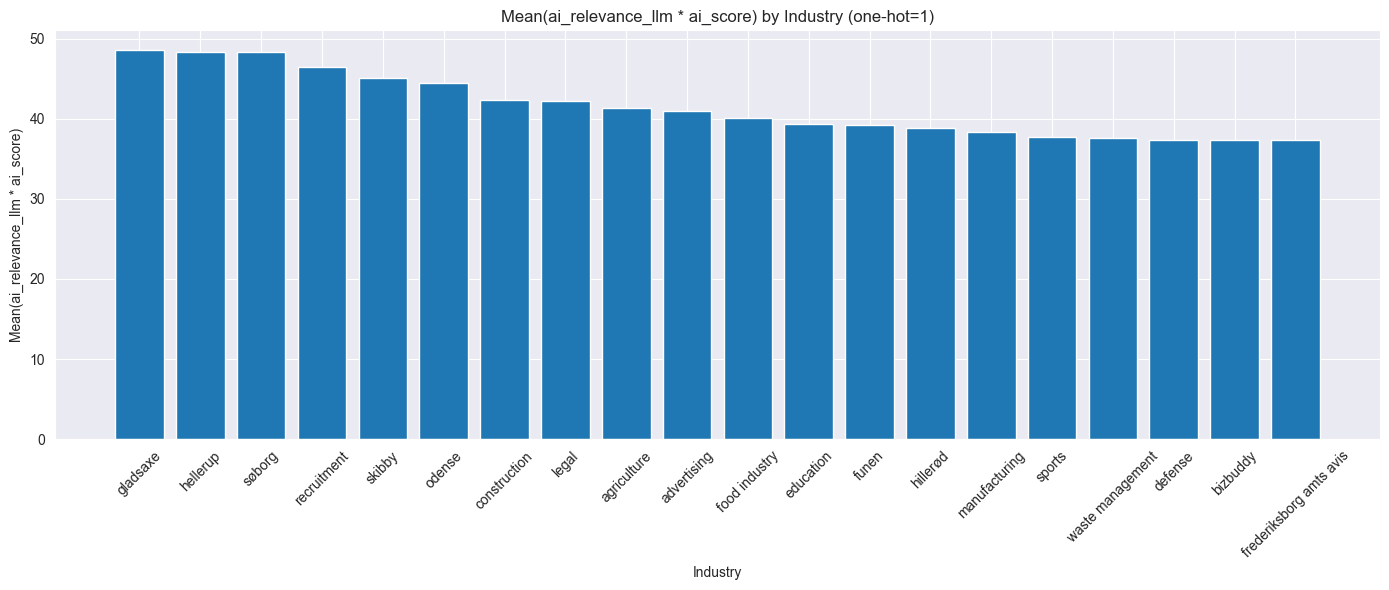

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读入：确保 index 是 orig_index
sbert_cosine_score = pd.read_csv("../results/02_ai_scores_v2.csv")

df = ai_df_30b[ai_df_30b['is_ai_llm']]


# 1) 准备 ai_score Series，并让 index 唯一
ai_score_s = pd.to_numeric(sbert_cosine_score["ai_score"], errors="coerce")

# 统一 index 类型（很关键：避免 "123" 和 123 对不上）
ai_score_s.index = pd.to_numeric(ai_score_s.index, errors="coerce").astype("Int64")
df["orig_index"] = pd.to_numeric(df["orig_index"], errors="coerce").astype("Int64")

# 如果 index 有重复：按 index 聚合（推荐 mean，也可用 first/max）
ai_score_s = ai_score_s.groupby(level=0).mean()

# 现在 index 一定唯一了，map 不会报错
df["ai_score"] = df["orig_index"].map(ai_score_s)

# 2) 数值化 relevance
df["ai_relevance_llm"] = pd.to_numeric(df["ai_relevance_llm"], errors="coerce")

# 3) industries one-hot（合并重复标签，避免重复行业名）
industry_cols = [c for c in df.columns if c.startswith("industries_llm_")]
onehot = df[industry_cols].fillna(0).astype(int)

def norm_industry(col: str) -> str:
    return col.replace("industries_llm_", "").strip().lower()

onehot = onehot.rename(columns={c: norm_industry(c) for c in industry_cols})
onehot = onehot.groupby(level=0, axis=1).max()

# 4) y = mean(ai_relevance_llm * ai_score) by industry
prod = df["ai_relevance_llm"] * df["ai_score"]
prod0 = prod.fillna(0)

valid = (~prod.isna()).astype(int)
counts = (onehot.mul(valid, axis=0)).sum(axis=0)
sum_prod = (onehot.mul(prod0, axis=0)).sum(axis=0)

industry_mean = (sum_prod / counts.replace(0, np.nan)).dropna().sort_values(ascending=False).head(20)

# 5) plot
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(industry_mean.index, industry_mean.values)
ax.set_title("Mean(ai_relevance_llm * ai_score) by Industry (one-hot=1)")
ax.set_xlabel("Industry")
ax.set_ylabel("Mean(ai_relevance_llm * ai_score)")
ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()
